# TITLE
[TOC]

In [1]:
import ROOT
import root_numpy as rnp
import l1THistos as histos
import math
import uuid

ROOT.enableJSVis()

from drawingTools import *

    

Welcome to JupyROOT 6.10/08


In [2]:

samplePU50 = Sample('NuGun', 'PU50')
samplePU100 = Sample('NuGun', 'PU100')
samplePU140 = Sample('NuGun', 'PU140')
samplePU200 = Sample('NuGun', 'PU200')


#samplePU50.histo_file.ls()

samples = [samplePU50, samplePU100, samplePU140, samplePU200]
pu_labels = [sample.pu_tag for sample in samples]



# NuGun samples with different PU

## Trigger Cell level plots

In [ ]:


htc_energies = [histos.TCHistos('h_tcAll', sample.histo_file).h_energy for sample in samples]

drawSame(htc_energies, pu_labels,'hist')

htc_energies_scaled = [histos.TCHistos('h_tcAll', sample.histo_file).h_energy.Clone() for sample in samples]

drawSame(htc_energies_scaled, pu_labels,'hist',norm=True, logy=True)

In [ ]:

htc_layerVenergy = [histos.TCHistos('h_tcAll', sample.histo_file).h_layerVenergy for sample in samples]

drawSeveral(htc_layerVenergy, pu_labels,'COLZ',do_profile=True)



In [ ]:
# we project the distribution on the single layer to assess the RMS
draw(htc_layerVenergy[0].ProjectionY(uuid.uuid4().hex[:6], 5, 5))

draw(htc_layerVenergy[3].ProjectionY(uuid.uuid4().hex[:6], 5, 5))


The plot below shows the average TC energy per layer # (integrated over all eta) for different PU.

In [ ]:


htc_profLayerVenergy = [histos.TCHistos('h_tcAll', sample.histo_file).h_layerVenergy.ProfileX(uuid.uuid4().hex[:6]) for sample in samples]
drawSame(htc_profLayerVenergy, pu_labels)

line = ROOT.TLine(0,1,60,1)
line.SetLineColor(2)
line.SetLineStyle(2)

#PU200/PU100
drawProfileRatio(htc_profLayerVenergy[3], htc_profLayerVenergy[2], ymin=0.8, ymax=1.2)
line.Draw('same')

#PU100/PU500
drawProfileRatio(htc_profLayerVenergy[1], htc_profLayerVenergy[0], ymin=0.8, ymax=1.2)
line.Draw('same')


In [ ]:
htc_layer = [histos.TCHistos('h_tcAll', sample.histo_file).h_layer for sample in samples]
drawSame(htc_layer, pu_labels)

In [ ]:
# ration PU200 PU100
drawProfileRatio(htc_layer[3], htc_layer[1], ymin=0, ymax=4)
line2 = ROOT.TLine(0,2,60,2)
line2.SetLineColor(2)
line2.SetLineStyle(2)
line2.Draw('same')

In [ ]:
# ration PU100 PU50
drawProfileRatio(htc_layer[1], htc_layer[0], ymin=0, ymax=4)
line2.Draw('same')

The # of TC per layer varies ~linearly with the PU, confirming that, apart from high-eta regions, the TC can "resolve" the PU.
The behavior vs eta is addressed in the following plots.


In [ ]:


htcAll_energyPetaVphi = [histos.TCHistos('h_tcAll', sample.histo_file).h_energyPetaVphi for sample in samples]
drawSeveral(htcAll_energyPetaVphi, pu_labels,'COLZ',do_profile=False)


In [ ]:
htcAll_energyVeta = [histos.TCHistos('h_tcAll', sample.histo_file).h_energyVeta for sample in samples]

drawSeveral(htcAll_energyVeta, pu_labels,'COLZ',do_profile=True)

In [ ]:
htcAll_profEnergyVeta = [histos.TCHistos('h_tcAll', sample.histo_file).h_energyVeta.ProfileX(uuid.uuid4().hex[:6]) for sample in samples]
drawSame(htcAll_profEnergyVeta, pu_labels)

In [ ]:
for hist in htcAll_profEnergyVeta:
    hist.GetYaxis().SetRangeUser(0.08,0.5)
drawSame(htcAll_profEnergyVeta, pu_labels)

line = ROOT.TLine(-4,1,+4,1)
line.SetLineColor(2)
line.SetLineStyle(2)
#PU100/PU50
drawProfileRatio(htcAll_profEnergyVeta[1], htcAll_profEnergyVeta[0], ymin=0.8, ymax=1.2)
line.Draw('same')


In [ ]:
#PU200/PU100
drawProfileRatio(htcAll_profEnergyVeta[3], htcAll_profEnergyVeta[2], ymin=0.8, ymax=1.2)
line.Draw('same')

In [ ]:
htcAll_profEnergyVetaL1t5 = [histos.TCHistos('h_tcAll', sample.histo_file).h_energyVetaL1t5.ProfileX(uuid.uuid4().hex[:6]) for sample in samples]
htcAll_profEnergyVetaL6t10 = [histos.TCHistos('h_tcAll', sample.histo_file).h_energyVetaL6t10.ProfileX(uuid.uuid4().hex[:6]) for sample in samples]
htcAll_profEnergyVetaL11t20 = [histos.TCHistos('h_tcAll', sample.histo_file).h_energyVetaL11t20.ProfileX(uuid.uuid4().hex[:6]) for sample in samples]
htcAll_profEnergyVetaL21t60 = [histos.TCHistos('h_tcAll', sample.histo_file).h_energyVetaL21t60.ProfileX(uuid.uuid4().hex[:6]) for sample in samples]

#PU200/PU100
drawProfileRatio(htcAll_profEnergyVetaL1t5[3], htcAll_profEnergyVetaL1t5[2], ymin=0.8, ymax=1.2)
line.Draw('same')
drawProfileRatio(htcAll_profEnergyVetaL6t10[3], htcAll_profEnergyVetaL6t10[2], ymin=0.8, ymax=1.2)
line.Draw('same')
drawProfileRatio(htcAll_profEnergyVetaL11t20[3], htcAll_profEnergyVetaL11t20[2], ymin=0.8, ymax=1.2)
line.Draw('same')
drawProfileRatio(htcAll_profEnergyVetaL21t60[3], htcAll_profEnergyVetaL21t60[2], ymin=0.8, ymax=1.2)
line.Draw('same')

## 2D cluster level plots

In [ ]:
hclAll_histos = [histos.ClusterHistos('h_clAll', sample.histo_file) for sample in samples]

hclAll_energies = [histo.h_energy for histo in hclAll_histos]
drawSame(hclAll_energies, pu_labels,'hist', logy=True)


hclAll_energies_scaled = [histo.h_energy.Clone() for histo in hclAll_histos]

drawSame(hclAll_energies_scaled, pu_labels,'hist',norm=True, logy=True)



In [ ]:
hclAll_layers = [histo.h_layer for histo in hclAll_histos]
drawSame(hclAll_layers, pu_labels,'hist', logy=True)


In [ ]:
hclAll_ncells = [histo.h_ncells for histo in hclAll_histos]
drawSame(hclAll_ncells, pu_labels,'hist', logy=True)


In [ ]:
hclAll_layerVenergy = [histo.h_layerVenergy for histo in hclAll_histos]
drawSeveral(hclAll_layerVenergy, pu_labels,'COLZ',do_profile=True)

In [ ]:
hclAll_profLayerVenergy = [histo.h_layerVenergy.ProfileX(uuid.uuid4().hex[:6]) for histo in hclAll_histos]
drawSame(hclAll_profLayerVenergy, pu_labels)


In [ ]:
hclAll_layerVncells = [histo.h_layerVncells for histo in hclAll_histos]
drawSeveral(hclAll_layerVncells, pu_labels,'COLZ',do_profile=True)

In [ ]:
hclAll_profLayerVncells = [histo.h_layerVncells.ProfileX(uuid.uuid4().hex[:6]) for histo in hclAll_histos]
drawSame(hclAll_profLayerVncells, pu_labels)

In [ ]:
#We plot the average energy per TC in a cluster

#PU 50 nugun
drawProfileRatio(hclAll_profLayerVenergy[0], hclAll_profLayerVncells[0], ymin=None, ymax=None)


In [ ]:
# we do the same for the PU200 nu gun
drawProfileRatio(hclAll_profLayerVenergy[3], hclAll_profLayerVncells[3], ymin=None, ymax=None)


# Electron resolution studies

In [3]:

version = 'v9'

sampleElePU0 = Sample('EleE50', 'PU0', version)
sampleElePU50 = Sample('EleE50', 'PU50', version)
sampleElePU100 = Sample('EleE50', 'PU100', version)
sampleElePU200 = Sample('EleE50', 'PU200', version)

eleSamples = [sampleElePU0, sampleElePU50, sampleElePU100, sampleElePU200]
elePu_labels = [sample.pu_tag for sample in eleSamples]

In [4]:

# NN plots
hcl3DAll_histos = [histos.Cluster3DHistos('h_cl3dAll', sample.histo_file) for sample in eleSamples]
hclAll_histos = [histos.ClusterHistos('h_clAll', sample.histo_file) for sample in eleSamples]

hcl3DMatch_histos = [histos.Cluster3DHistos('h_cl3dMatch', sample.histo_file) for sample in eleSamples]
hclMatch_histos = [histos.ClusterHistos('h_clMatch', sample.histo_file) for sample in eleSamples]
htcMatch_histos = [histos.TCHistos('h_tcMatch', sample.histo_file) for sample in eleSamples]

helereso_histos = [histos.ResoHistos('h_EleReso', sample.histo_file) for sample in eleSamples]

hreso2D_histos = [histos.Reso2DHistos('h_ClReso', sample.histo_file) for sample in eleSamples]

#heleresoDBS_test = histos.ResoHistos('h_EleReso', file_test)



['h_cl3dAll_eMaxOverE', 'h_cl3dAll_energy', 'h_cl3dAll_firstlayer', 'h_cl3dAll_nclu', 'h_cl3dAll_pt', 'h_cl3dAll_sEtaEtaMax', 'h_cl3dAll_sEtaEtaTot', 'h_cl3dAll_sPhiPhiMax', 'h_cl3dAll_sPhiPhiTot', 'h_cl3dAll_sZZ', 'h_cl3dAll_showlenght']
['h_cl3dAll_eMaxOverE', 'h_cl3dAll_energy', 'h_cl3dAll_firstlayer', 'h_cl3dAll_nclu', 'h_cl3dAll_pt', 'h_cl3dAll_sEtaEtaMax', 'h_cl3dAll_sEtaEtaTot', 'h_cl3dAll_sPhiPhiMax', 'h_cl3dAll_sPhiPhiTot', 'h_cl3dAll_sZZ', 'h_cl3dAll_showlenght']
['h_cl3dAll_eMaxOverE', 'h_cl3dAll_energy', 'h_cl3dAll_firstlayer', 'h_cl3dAll_nclu', 'h_cl3dAll_pt', 'h_cl3dAll_sEtaEtaMax', 'h_cl3dAll_sEtaEtaTot', 'h_cl3dAll_sPhiPhiMax', 'h_cl3dAll_sPhiPhiTot', 'h_cl3dAll_sZZ', 'h_cl3dAll_showlenght']
['h_cl3dAll_eMaxOverE', 'h_cl3dAll_energy', 'h_cl3dAll_firstlayer', 'h_cl3dAll_nclu', 'h_cl3dAll_pt', 'h_cl3dAll_sEtaEtaMax', 'h_cl3dAll_sEtaEtaTot', 'h_cl3dAll_sPhiPhiMax', 'h_cl3dAll_sPhiPhiTot', 'h_cl3dAll_sZZ', 'h_cl3dAll_showlenght']
['h_clAll_energy', 'h_clAll_layer', 'h_clAll

In [5]:
# GEO plots
hcl3DAllGEO_histos = [histos.Cluster3DHistos('h_cl3dGEOAll', sample.histo_file) for sample in eleSamples]
hclAllGEO_histos = [histos.ClusterHistos('h_clGEOAll', sample.histo_file) for sample in eleSamples]

hcl3DMatchGEO_histos = [histos.Cluster3DHistos('h_cl3dMatchGEO', sample.histo_file) for sample in eleSamples]
hclMatchGEO_histos = [histos.ClusterHistos('h_clMatchGEO', sample.histo_file) for sample in eleSamples]
htcMatchGEO_histos = [histos.TCHistos('h_tcMatchGEO', sample.histo_file) for sample in eleSamples]

heleresoGEO_histos = [histos.ResoHistos('h_EleResoGEO', sample.histo_file) for sample in eleSamples]

hreso2DGEO_histos = [histos.Reso2DHistos('h_ClResoGEO', sample.histo_file) for sample in eleSamples]



['h_cl3dGEOAll_eMaxOverE', 'h_cl3dGEOAll_energy', 'h_cl3dGEOAll_firstlayer', 'h_cl3dGEOAll_nclu', 'h_cl3dGEOAll_pt', 'h_cl3dGEOAll_sEtaEtaMax', 'h_cl3dGEOAll_sEtaEtaTot', 'h_cl3dGEOAll_sPhiPhiMax', 'h_cl3dGEOAll_sPhiPhiTot', 'h_cl3dGEOAll_sZZ', 'h_cl3dGEOAll_showlenght']
['h_cl3dGEOAll_eMaxOverE', 'h_cl3dGEOAll_energy', 'h_cl3dGEOAll_firstlayer', 'h_cl3dGEOAll_nclu', 'h_cl3dGEOAll_pt', 'h_cl3dGEOAll_sEtaEtaMax', 'h_cl3dGEOAll_sEtaEtaTot', 'h_cl3dGEOAll_sPhiPhiMax', 'h_cl3dGEOAll_sPhiPhiTot', 'h_cl3dGEOAll_sZZ', 'h_cl3dGEOAll_showlenght']
['h_cl3dGEOAll_eMaxOverE', 'h_cl3dGEOAll_energy', 'h_cl3dGEOAll_firstlayer', 'h_cl3dGEOAll_nclu', 'h_cl3dGEOAll_pt', 'h_cl3dGEOAll_sEtaEtaMax', 'h_cl3dGEOAll_sEtaEtaTot', 'h_cl3dGEOAll_sPhiPhiMax', 'h_cl3dGEOAll_sPhiPhiTot', 'h_cl3dGEOAll_sZZ', 'h_cl3dGEOAll_showlenght']
['h_cl3dGEOAll_eMaxOverE', 'h_cl3dGEOAll_energy', 'h_cl3dGEOAll_firstlayer', 'h_cl3dGEOAll_nclu', 'h_cl3dGEOAll_pt', 'h_cl3dGEOAll_sEtaEtaMax', 'h_cl3dGEOAll_sEtaEtaTot', 'h_cl3dGEOAll

In [6]:
# DBSCAN plots
hcl3DAllDBS_histos = [histos.Cluster3DHistos('h_cl3dDBSAll', sample.histo_file) for sample in eleSamples]
hclAllDBS_histos = [histos.ClusterHistos('h_clDBSAll', sample.histo_file) for sample in eleSamples]

hcl3DMatchDBS_histos = [histos.Cluster3DHistos('h_cl3dMatchDBS', sample.histo_file) for sample in eleSamples]
hclMatchDBS_histos = [histos.ClusterHistos('h_clMatchDBS', sample.histo_file) for sample in eleSamples]

htcMatchDBS_histos = [histos.TCHistos('h_tcMatchDBS', sample.histo_file) for sample in eleSamples]

heleresoDBS_histos = [histos.ResoHistos('h_EleResoDBS', sample.histo_file) for sample in eleSamples]

hreso2DDBS_histos = [histos.Reso2DHistos('h_ClResoDBS', sample.histo_file) for sample in eleSamples]


['h_cl3dDBSAll_eMaxOverE', 'h_cl3dDBSAll_energy', 'h_cl3dDBSAll_firstlayer', 'h_cl3dDBSAll_nclu', 'h_cl3dDBSAll_pt', 'h_cl3dDBSAll_sEtaEtaMax', 'h_cl3dDBSAll_sEtaEtaTot', 'h_cl3dDBSAll_sPhiPhiMax', 'h_cl3dDBSAll_sPhiPhiTot', 'h_cl3dDBSAll_sZZ', 'h_cl3dDBSAll_showlenght']
['h_cl3dDBSAll_eMaxOverE', 'h_cl3dDBSAll_energy', 'h_cl3dDBSAll_firstlayer', 'h_cl3dDBSAll_nclu', 'h_cl3dDBSAll_pt', 'h_cl3dDBSAll_sEtaEtaMax', 'h_cl3dDBSAll_sEtaEtaTot', 'h_cl3dDBSAll_sPhiPhiMax', 'h_cl3dDBSAll_sPhiPhiTot', 'h_cl3dDBSAll_sZZ', 'h_cl3dDBSAll_showlenght']
['h_cl3dDBSAll_eMaxOverE', 'h_cl3dDBSAll_energy', 'h_cl3dDBSAll_firstlayer', 'h_cl3dDBSAll_nclu', 'h_cl3dDBSAll_pt', 'h_cl3dDBSAll_sEtaEtaMax', 'h_cl3dDBSAll_sEtaEtaTot', 'h_cl3dDBSAll_sPhiPhiMax', 'h_cl3dDBSAll_sPhiPhiTot', 'h_cl3dDBSAll_sZZ', 'h_cl3dDBSAll_showlenght']
['h_cl3dDBSAll_eMaxOverE', 'h_cl3dDBSAll_energy', 'h_cl3dDBSAll_firstlayer', 'h_cl3dDBSAll_nclu', 'h_cl3dDBSAll_pt', 'h_cl3dDBSAll_sEtaEtaMax', 'h_cl3dDBSAll_sEtaEtaTot', 'h_cl3dDBSAll

In [7]:
files = [sample.histo_file for sample in eleSamples]
print files
print helereso_histos
print helereso_histos[0].h_energyResVeta

[<ROOT.TFile object ("histos_EleE50_PU0_v9.root") at 0x7fc876c9a6f0>, <ROOT.TFile object ("histos_EleE50_PU50_v9.root") at 0x7fc876f57a80>, <ROOT.TFile object ("histos_EleE50_PU100_v9.root") at 0x7fc876c9b0a0>, <ROOT.TFile object ("histos_EleE50_PU200_v9.root") at 0x7fc876dce950>]
[<l1THistos.ResoHistos instance at 0x122ec9248>, <l1THistos.ResoHistos instance at 0x122ec9710>, <l1THistos.ResoHistos instance at 0x122ec97e8>, <l1THistos.ResoHistos instance at 0x122ec9830>]
<ROOT.TH2F object ("h_EleReso_energyResVeta") at 0x7fc875d3d200>


## # of 2D clusters (overall)

In [8]:
hclAll_layer = [histo.h_layer for histo in hclAll_histos]
drawSame(hclAll_layer, elePu_labels,'hist',logy=True)

In [9]:
hclAllGEO_layer = [histo.h_layer for histo in hclAllGEO_histos]
drawSame(hclAllGEO_layer, elePu_labels,'hist',logy=True)

In [10]:
hclAllDBS_layer = [histo.h_layer for histo in hclAllDBS_histos]
drawSame(hclAllDBS_layer, elePu_labels,'hist',logy=True)

In [11]:
drawSame([hclAll_layer[0], hclAllGEO_layer[0], hclAllDBS_layer[0]], ['PU0 NN', 'PU0 GEO', 'PU0 DBSCAN'],'hist',logy=True)

In [12]:
drawSame([hclAll_layer[3], hclAllGEO_layer[3], hclAllDBS_layer[3]], ['PU200 NN', 'PU200 GEO', 'PU200 DBSCAN'],'hist')

## # of 3D clusters

In [13]:
#of 3D clusters:
hcl3DAll_pt = [histo.h_pt for histo in hcl3DAll_histos]

hcl3DAllDBS_pt = [histo.h_pt for histo in hcl3DAllDBS_histos]

print 'PU0, #3D NN clusters: {}, #3D DBS clusters {}'.format(hcl3DAll_pt[0].Integral(), hcl3DAllDBS_pt[0].Integral())
print 'PU50, #3D NN clusters: {}, #3D DBS clusters {}'.format(hcl3DAll_pt[1].Integral(), hcl3DAllDBS_pt[1].Integral())
print 'PU100, #3D NN clusters: {}, #3D DBS clusters {}'.format(hcl3DAll_pt[2].Integral(), hcl3DAllDBS_pt[2].Integral())
print 'PU200, #3D NN clusters: {}, #3D DBS clusters {}'.format(hcl3DAll_pt[3].Integral(), hcl3DAllDBS_pt[3].Integral())




PU0, #3D NN clusters: 2818.0, #3D DBS clusters 2015.0
PU50, #3D NN clusters: 119808.0, #3D DBS clusters 3429.0
PU100, #3D NN clusters: 255554.0, #3D DBS clusters 5462.0
PU200, #3D NN clusters: 639039.0, #3D DBS clusters 27279.0


In [14]:
hcl3DAll_energy = [histo.h_energy for histo in hcl3DAll_histos]
drawSame(hcl3DAll_energy, elePu_labels, logy=True)

In [15]:
hcl3DAllGEO_energy = [histo.h_energy for histo in hcl3DAllGEO_histos]
drawSame(hcl3DAllGEO_energy, elePu_labels, logy=True)

In [16]:
hcl3DAllDBS_energy = [histo.h_energy for histo in hcl3DAllDBS_histos]
drawSame(hcl3DAllDBS_energy, elePu_labels, logy=True)

## Number of clusters

### NN Clusters
We look at cluters matched with GEN particle

In [17]:
hclMatch_layer_norm = [hist.h_layer.Clone() for hist in hclMatch_histos]
drawSame(hclMatch_layer_norm, elePu_labels, norm=True)

### GEO clusters

In [18]:
hclMatchGEO_layer_norm = [hist.h_layer.Clone() for hist in hclMatchGEO_histos]
drawSame(hclMatchGEO_layer_norm, elePu_labels, norm=True)

### DBS clusters

In [19]:
hclMatchDBS_layer_norm = [hist.h_layer.Clone() for hist in hclMatchDBS_histos]
drawSame(hclMatchDBS_layer_norm, elePu_labels, norm=True)

In [20]:

drawSame([hclMatch_layer_norm[0], hclMatchGEO_layer_norm[0], hclMatchDBS_layer_norm[0]], ['PU0 NN', 'PU0 GEO', 'PU0 DBS'])

In [21]:
drawSame([hclMatch_layer_norm[1], hclMatchGEO_layer_norm[1], hclMatchDBS_layer_norm[1]], ['PU50 NN', 'PU50 GEO' ,'PU50 DBS'])

In [22]:
drawSame([hclMatch_layer_norm[3], hclMatchGEO_layer_norm[1], hclMatchDBS_layer_norm[3]], ['PU200 NN', 'PU200 GEO', 'PU200 DBS'])

### NN Clusters

In [23]:
hclMatch_ncells = [hist.h_ncells for hist in hclMatch_histos]
drawSame(hclMatch_ncells, elePu_labels)

[<ROOT.TH2F object ("h_clMatch_layerVncells") at 0x7fc875a6b800>, <ROOT.TH2F object ("h_clMatch_layerVncells") at 0x7fc875cfc400>, <ROOT.TH2F object ("h_clMatch_layerVncells") at 0x7fc875d1d400>, <ROOT.TH2F object ("h_clMatch_layerVncells") at 0x7fc87560f600>]


The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


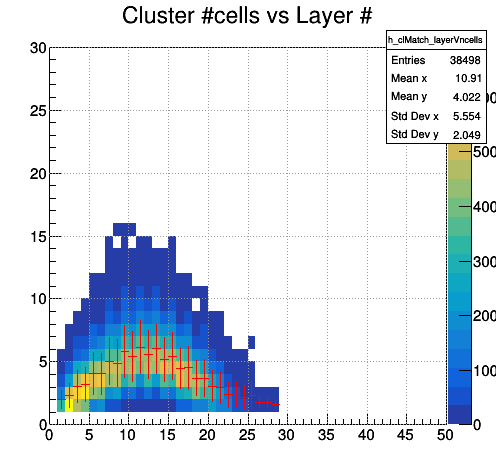

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


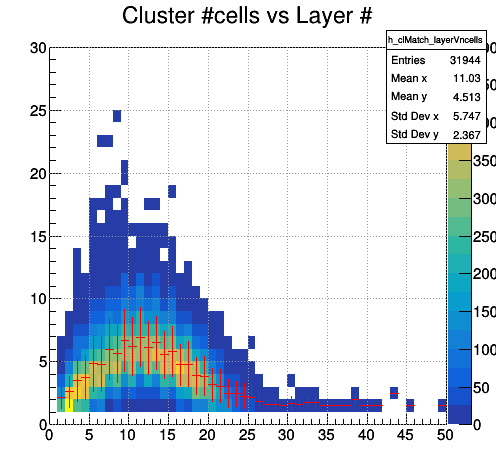

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


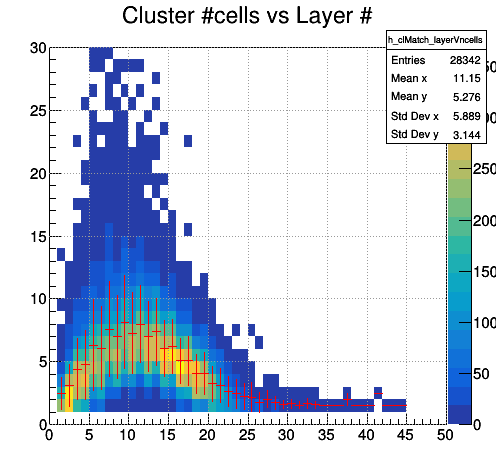

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


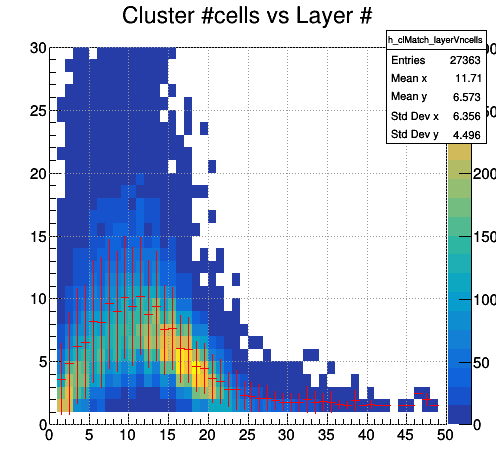

In [25]:
hclMatch_layerVncells = [histo.h_layerVncells for histo in hclMatch_histos]
print hclMatch_layerVncells
drawSeveral(hclMatch_layerVncells, elePu_labels,'COLZ',do_profile=True)


The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


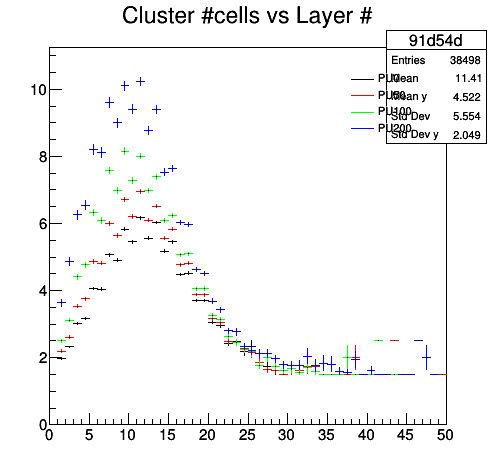

In [26]:
hclMatch_profLayerVncells = [histo.h_layerVncells.ProfileX(uuid.uuid4().hex[:6]) for histo in hclMatch_histos]
drawSame(hclMatch_profLayerVncells, elePu_labels)

### GEO clusters

In [27]:
hclMatchGEO_ncells = [hist.h_ncells for hist in hclMatchGEO_histos]
drawSame(hclMatchGEO_ncells, elePu_labels)

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


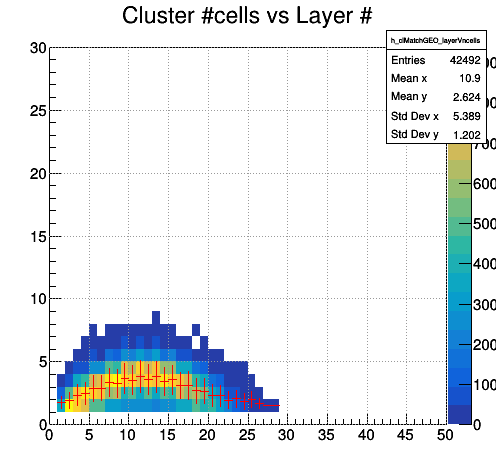

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


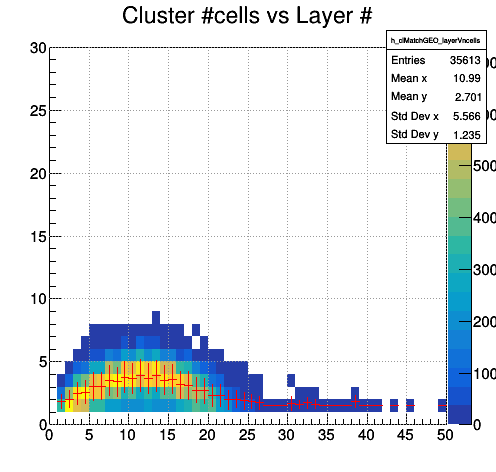

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


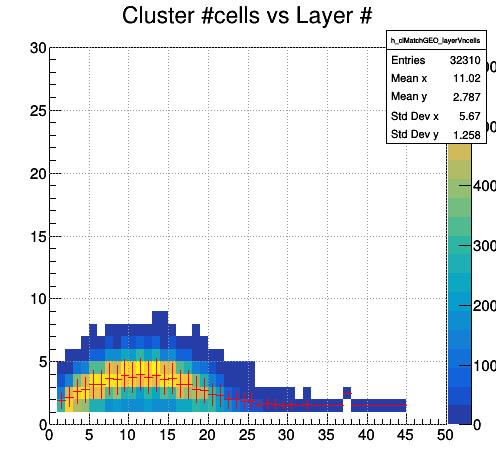

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


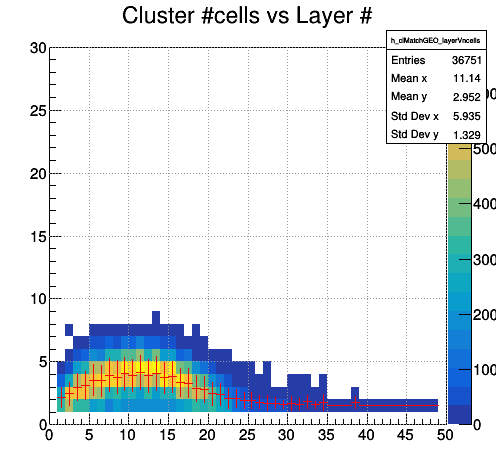

In [28]:
hclMatchGEO_layerVncells = [histo.h_layerVncells for histo in hclMatchGEO_histos]
drawSeveral(hclMatchGEO_layerVncells, elePu_labels,'COLZ',do_profile=True)


The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


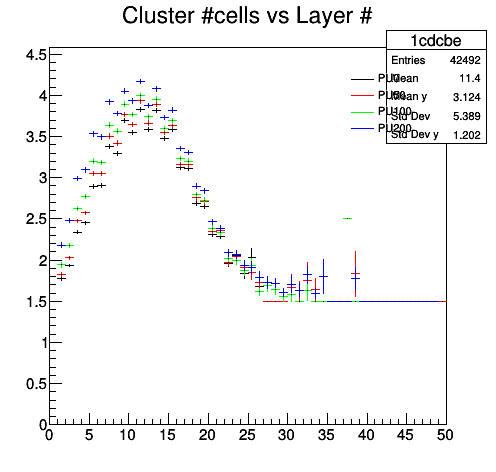

In [29]:
hclMatchGEO_profLayerVncells = [histo.h_layerVncells.ProfileX(uuid.uuid4().hex[:6]) for histo in hclMatchGEO_histos]
drawSame(hclMatchGEO_profLayerVncells, elePu_labels)

### DBS Clusters

In [30]:
hclMatchDBS_ncells = [hist.h_ncells for hist in hclMatchDBS_histos]
drawSame(hclMatchDBS_ncells, elePu_labels)

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


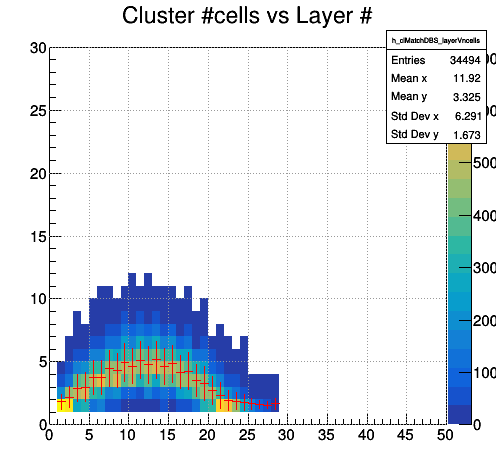

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


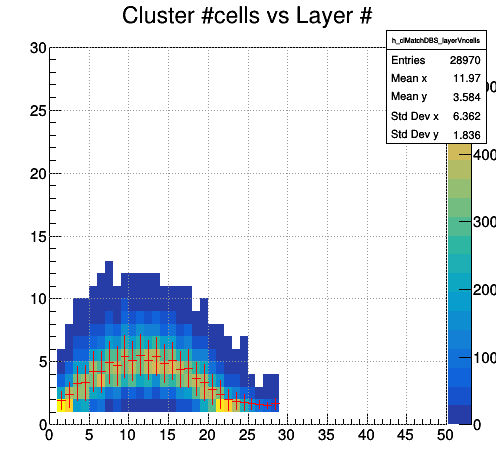

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


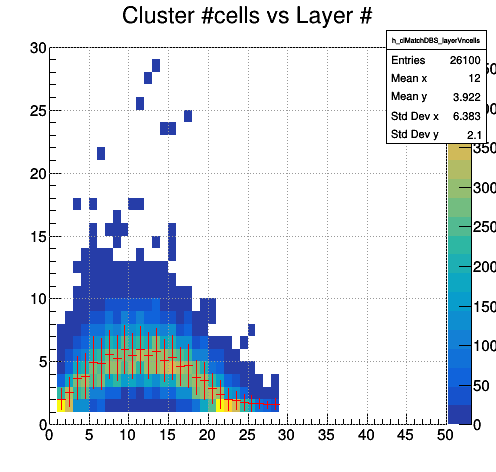

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


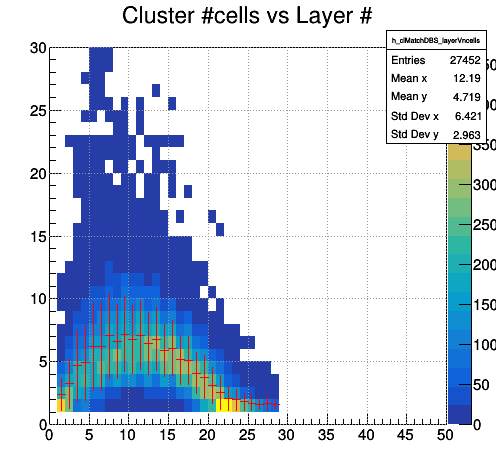

In [31]:

hclMatchDBS_layerVncells = [histo.h_layerVncells for histo in hclMatchDBS_histos]
drawSeveral(hclMatchDBS_layerVncells, elePu_labels,'COLZ',do_profile=True)


The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


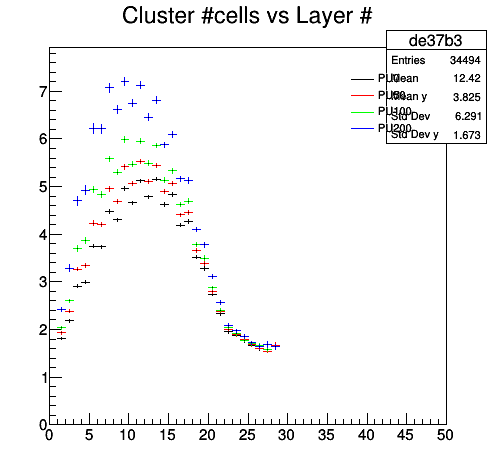

In [32]:
hclMatchDBS_profLayerVncells = [histo.h_layerVncells.ProfileX(uuid.uuid4().hex[:6]) for histo in hclMatchDBS_histos]
drawSame(hclMatchDBS_profLayerVncells, elePu_labels)

### Compare the layer by layer projections

In [35]:
def projectLayers(plot2D):
    return [plot2D.ProjectionY(uuid.uuid4().hex[:6], layer, layer) for layer in range(2,29)]


hclMatch_PU0_layerVncellsProj = projectLayers(hclMatch_layerVncells[0])
hclMatch_PU50_layerVncellsProj = projectLayers(hclMatch_layerVncells[1])
hclMatch_PU100_layerVncellsProj = projectLayers(hclMatch_layerVncells[2])
hclMatch_PU200_layerVncellsProj = projectLayers(hclMatch_layerVncells[3])

hclMatchGEO_PU0_layerVncellsProj = projectLayers(hclMatchGEO_layerVncells[0])
hclMatchGEO_PU50_layerVncellsProj = projectLayers(hclMatchGEO_layerVncells[1])
hclMatchGEO_PU100_layerVncellsProj = projectLayers(hclMatchGEO_layerVncells[2])
hclMatchGEO_PU200_layerVncellsProj = projectLayers(hclMatchGEO_layerVncells[3])


hclMatchDBS_PU0_layerVncellsProj = projectLayers(hclMatchDBS_layerVncells[0])
hclMatchDBS_PU50_layerVncellsProj = projectLayers(hclMatchDBS_layerVncells[1])
hclMatchDBS_PU100_layerVncellsProj = projectLayers(hclMatchDBS_layerVncells[2])
hclMatchDBS_PU200_layerVncellsProj = projectLayers(hclMatchDBS_layerVncells[3])



In [36]:
ly = 1
drawSame([hclMatch_PU0_layerVncellsProj[ly], hclMatch_PU50_layerVncellsProj[ly], hclMatch_PU100_layerVncellsProj[ly], hclMatch_PU200_layerVncellsProj[ly]], elePu_labels)
drawSame([hclMatchGEO_PU0_layerVncellsProj[ly], hclMatchGEO_PU50_layerVncellsProj[ly], hclMatchGEO_PU100_layerVncellsProj[ly], hclMatchGEO_PU200_layerVncellsProj[ly]], elePu_labels)
drawSame([hclMatchDBS_PU0_layerVncellsProj[ly], hclMatchDBS_PU50_layerVncellsProj[ly], hclMatchDBS_PU100_layerVncellsProj[ly], hclMatchDBS_PU200_layerVncellsProj[ly]], elePu_labels)






In [37]:
drawSame([hclMatch_PU200_layerVncellsProj[ly], hclMatchGEO_PU200_layerVncellsProj[ly], hclMatchDBS_PU200_layerVncellsProj[ly]], ['NN PU200', 'GEO PU200', 'DBS PU200'])


In [38]:
ly = 10
drawSame([hclMatch_PU0_layerVncellsProj[ly], hclMatch_PU50_layerVncellsProj[ly], hclMatch_PU100_layerVncellsProj[ly], hclMatch_PU200_layerVncellsProj[ly]], elePu_labels)
drawSame([hclMatchGEO_PU0_layerVncellsProj[ly], hclMatchGEO_PU50_layerVncellsProj[ly], hclMatchGEO_PU100_layerVncellsProj[ly], hclMatchGEO_PU200_layerVncellsProj[ly]], elePu_labels)
drawSame([hclMatchDBS_PU0_layerVncellsProj[ly], hclMatchDBS_PU50_layerVncellsProj[ly], hclMatchDBS_PU100_layerVncellsProj[ly], hclMatchDBS_PU200_layerVncellsProj[ly]], elePu_labels)



In [39]:
drawSame([hclMatch_PU200_layerVncellsProj[ly], hclMatchGEO_PU200_layerVncellsProj[ly], hclMatchDBS_PU200_layerVncellsProj[ly]], ['NN PU200', 'GEO PU200', 'DBS PU200'])


In [ ]:
drawSame([hclMatch_PU200_layerVncellsProj[ly], hclMatchDBS_PU200_layerVncellsProj[ly]], ['NN PU200', 'DBS PU200'])


In [ ]:
ly = 15
drawSame([hclMatch_PU0_layerVncellsProj[ly], hclMatch_PU50_layerVncellsProj[ly], hclMatch_PU100_layerVncellsProj[ly], hclMatch_PU200_layerVncellsProj[ly]], elePu_labels)
drawSame([hclMatchDBS_PU0_layerVncellsProj[ly], hclMatchDBS_PU50_layerVncellsProj[ly], hclMatchDBS_PU100_layerVncellsProj[ly], hclMatchDBS_PU200_layerVncellsProj[ly]], elePu_labels)


In [ ]:
drawSame([hclMatch_PU200_layerVncellsProj[ly], hclMatchDBS_PU200_layerVncellsProj[ly]], ['NN PU200', 'DBS PU200'])


In [ ]:
ly = 20
drawSame([hclMatch_PU0_layerVncellsProj[ly], hclMatch_PU50_layerVncellsProj[ly], hclMatch_PU100_layerVncellsProj[ly], hclMatch_PU200_layerVncellsProj[ly]], elePu_labels)
drawSame([hclMatchDBS_PU0_layerVncellsProj[ly], hclMatchDBS_PU50_layerVncellsProj[ly], hclMatchDBS_PU100_layerVncellsProj[ly], hclMatchDBS_PU200_layerVncellsProj[ly]], elePu_labels)


In [ ]:
drawSame([hclMatch_PU200_layerVncellsProj[ly], hclMatchDBS_PU200_layerVncellsProj[ly]], ['NN PU200', 'DBS PU200'])


We now compare NN and DBS clusters at the same PU

In [ ]:
drawSame([hclMatch_profLayerVncells[0], hclMatchDBS_profLayerVncells[0]], ['PU0 NN', 'PU0 DBS'])

In [ ]:
drawSame([hclMatch_profLayerVncells[1], hclMatchDBS_profLayerVncells[1]], ['PU50 NN', 'PU50 DBS'])

In [ ]:
drawSame([hclMatch_profLayerVncells[2], hclMatchDBS_profLayerVncells[2]], ['PU100 NN', 'PU100 DBS'])

In [ ]:
drawSame([hclMatch_profLayerVncells[3], hclMatchDBS_profLayerVncells[3]], ['PU200 NN', 'PU200 DBS'])

In [ ]:

hclMatchDBS_layerVnCoreCells = [histo.h_layerVnCoreCells for histo in hclMatchDBS_histos]
drawSeveral(hclMatchDBS_layerVnCoreCells, elePu_labels,'COLZ',do_profile=True)


In [ ]:
hclMatchDBS_profLayerVnCoreCells = [histo.h_layerVnCoreCells.ProfileX(uuid.uuid4().hex[:6]) for histo in hclMatchDBS_histos]
drawSame(hclMatchDBS_profLayerVnCoreCells, elePu_labels)

In [ ]:
drawSame([hclMatch_profLayerVncells[0], hclMatchDBS_profLayerVnCoreCells[0]], ['PU0 NN', 'PU0 DBS CORE'])

In [ ]:
drawSame([hclMatch_profLayerVncells[3], hclMatchDBS_profLayerVnCoreCells[3]], ['PU200 NN', 'PU200 DBS CORE'])

## Cluster Energy
### NN Clusters

In [ ]:
hclMatch_layerVenergy = [histo.h_layerVenergy for histo in hclMatch_histos]
drawSeveral(hclMatch_layerVenergy, elePu_labels,'COLZ',do_profile=True)

In [ ]:
hclMatch_profLayerVenergy = [histo.h_layerVenergy.ProfileX(uuid.uuid4().hex[:6]) for histo in hclMatch_histos]
drawSame(hclMatch_profLayerVenergy, elePu_labels)

Average energy per cell in each layer

In [ ]:
#PU 0 ele 50GeV
drawProfileRatio(hclMatch_profLayerVenergy[0], hclMatch_profLayerVncells[0], ymin=None, ymax=None)


In [ ]:
#PU 200 ele 50GeV
drawProfileRatio(hclMatch_profLayerVenergy[3], hclMatch_profLayerVncells[3], ymin=None, ymax=None)


### DBS clusters

In [ ]:
hclMatchDBS_layerVenergy = [histo.h_layerVenergy for histo in hclMatchDBS_histos]
drawSeveral(hclMatchDBS_layerVenergy, elePu_labels,'COLZ',do_profile=True)

In [ ]:
hclMatchDBS_profLayerVenergy = [histo.h_layerVenergy.ProfileX(uuid.uuid4().hex[:6]) for histo in hclMatchDBS_histos]
drawSame(hclMatchDBS_profLayerVenergy, elePu_labels)

In [ ]:
#PU 200 ele 50GeV
drawProfileRatio(hclMatchDBS_profLayerVenergy[3], hclMatchDBS_profLayerVncells[3], ymin=None, ymax=None)


We compare DBS and NN cluters for PU 200

In [ ]:
drawSame([hclMatch_profLayerVenergy[3], hclMatchDBS_profLayerVenergy[3]], ['PU200 NN', 'PU200 DBSCAN'])

In [ ]:
drawSame([hclMatch_profLayerVenergy[0], hclMatchDBS_profLayerVenergy[0]], ['PU0 NN', 'PU0 DBSCAN'])

## Number of 2D clusters in the matched 3D cluster
### NN clusters

In [ ]:
hcl3DMatch_nclu = [hist.h_nclu for hist in hcl3DMatch_histos]
drawSame(hcl3DMatch_nclu, elePu_labels)

### DBS clusters

In [ ]:
hcl3DMatchDBS_nclu = [hist.h_nclu for hist in hcl3DMatchDBS_histos]
drawSame(hcl3DMatchDBS_nclu, elePu_labels)

We compare NN and DBS distributions

In [ ]:
drawSame([hcl3DMatch_nclu[0], hcl3DMatchDBS_nclu[0]], ['PU0 NN', 'PU0 DBSCAN'])

In [ ]:
drawSame([hcl3DMatch_nclu[1], hcl3DMatchDBS_nclu[1]], ['PU50 NN', 'PU50 DBSCAN'])

In [ ]:
drawSame([hcl3DMatch_nclu[2], hcl3DMatchDBS_nclu[2]], ['PU100 NN', 'PU100 DBSCAN'])

In [ ]:
drawSame([hcl3DMatch_nclu[3], hcl3DMatchDBS_nclu[3]], ['PU200 NN', 'PU200 DBSCAN'])
# how come that there are 3D NN clusters with < 3 associated clusters?? isn't there a cut at 3?

## 3D cluster energy
### NN clusters

In [ ]:
hcl3DMatch_energy = [hist.h_energy for hist in hcl3DMatch_histos]
drawSame(hcl3DMatch_energy, elePu_labels)

### DBS clusters

In [ ]:
hcl3DMatchDBS_energy = [hist.h_energy for hist in hcl3DMatchDBS_histos]
drawSame(hcl3DMatchDBS_energy, elePu_labels)

## Energy of matched TCs
### NN clusters

In [ ]:
htcMatch_energy = [hist.h_energy for hist in htcMatch_histos]
drawSame(htcMatch_energy, elePu_labels, options='hist')

htcMatch_energy_norm = [hist.h_energy.Clone() for hist in htcMatch_histos]
drawSame(htcMatch_energy_norm, elePu_labels,norm=True, options='hist')


### DBS clusters

In [ ]:
htcMatchDBS_energy = [hist.h_energy for hist in htcMatchDBS_histos]
drawSame(htcMatchDBS_energy, elePu_labels, options='hist')

htcMatchDBS_energy_norm = [hist.h_energy.Clone() for hist in htcMatchDBS_histos]
drawSame(htcMatchDBS_energy_norm, elePu_labels,norm=True, options='hist')


In [ ]:
# let's compare E distribution with and without signal
tc_energies_comp = [htcMatch_energy_norm[3], htc_energies_scaled[3]]
drawSame(tc_energies_comp, ['w 50GeV signal PU200', 'nu-gun PU200'])

In [ ]:
hclMatch_energy = [hist.h_energy for hist in hclMatch_histos]
drawSame(hclMatch_energy, elePu_labels, options='hist')

hclMatch_energy_norm = [hist.h_energy.Clone() for hist in hclMatch_histos]
drawSame(hclMatch_energy_norm, elePu_labels,norm=True, options='hist')






In [ ]:
cl2d_energy_comp = [hclMatch_energy_norm[3], hclAll_energies_scaled[3]]
drawSame(cl2d_energy_comp, ['w 50GeV signal PU200', 'nu-gun PU200'])

In [ ]:
htcMatch_layer = [hist.h_layer for hist in htcMatch_histos]
drawSame(htcMatch_layer, elePu_labels, options='hist')


In [ ]:
htcMatchDBS_layer = [hist.h_layer for hist in htcMatchDBS_histos]
drawSame(htcMatchDBS_layer, elePu_labels, options='hist')


In [ ]:
htcMatch_energyVlayer = [hist.h_layerVenergy for hist in htcMatch_histos]
drawSeveral(htcMatch_energyVlayer, elePu_labels, 'COLZ',do_profile=True)


In [ ]:
# the average energy per TC in a 3D cluster diminishes at higher PU since low PU TCs 
# are added indefinetely by the NN clustering

htcMatch_profEnergyVlayer = [hist.ProfileX(uuid.uuid4().hex[:6]) for hist in htcMatch_energyVlayer]
drawSame(htcMatch_profEnergyVlayer, elePu_labels)

In [ ]:
helereso_ptRes = [hist.h_ptRes for hist in helereso_histos]
drawSame(helereso_ptRes, elePu_labels)

## Energy resolution
### NN clusters

In [40]:
helereso_energyRes = [hist.h_energyRes for hist in helereso_histos]
drawSame(helereso_energyRes, elePu_labels,options='hist')

### GEO clusters

In [41]:
heleresoGEO_energyRes = [hist.h_energyRes for hist in heleresoGEO_histos]
drawSame(heleresoGEO_energyRes, elePu_labels,options='hist')

### DBS cluster

In [42]:
heleresoDBS_energyRes = [hist.h_energyRes for hist in heleresoDBS_histos]
drawSame(heleresoDBS_energyRes, elePu_labels,options='hist')

## Resolution using layers 10 to 20 only

In [ ]:
helereso_centralEnergyRes = [hist.h_centralEnergyRes for hist in helereso_histos]
drawSame(helereso_centralEnergyRes, elePu_labels, options='hist')

In [ ]:
heleresoDBS_centralEnergyRes = [hist.h_centralEnergyRes for hist in heleresoDBS_histos]
drawSame(heleresoDBS_centralEnergyRes, elePu_labels,options='hist')

In [ ]:
drawSame([helereso_centralEnergyRes[3], heleresoDBS_centralEnergyRes[3]], ['NN PU200', 'DBS PU200'])

In [43]:
heleresoDBS_coreEnergyRes = [hist.h_coreEnergyRes for hist in heleresoDBS_histos]
drawSame(heleresoDBS_coreEnergyRes, elePu_labels,options='hist')

In [46]:

helereso_energyRes_scaled = [hist.Clone() for hist in helereso_energyRes]
heleresoGEO_energyRes_scaled = [hist.Clone() for hist in heleresoGEO_energyRes]

heleresoDBS_energyRes_scaled = [hist.Clone() for hist in heleresoDBS_energyRes]
heleresoDBS_coreEnergyRes_scaled = [hist.Clone() for hist in heleresoDBS_coreEnergyRes]


In [48]:
# we compare resolutions @ PU 0
puIdx = 0
drawSame([helereso_energyRes[puIdx], heleresoGEO_energyRes[puIdx], heleresoDBS_energyRes[puIdx]], ['PU0 NN clusters', 'PU0 GEO', 'PU0 DBSCAN clusters'], options='hist', norm=False)
drawSame([helereso_energyRes_scaled[puIdx], heleresoGEO_energyRes_scaled[puIdx], heleresoDBS_energyRes_scaled[puIdx]], ['PU0 NN clusters', 'PU0 GEO', 'PU0 DBSCAN clusters'], options='hist', norm=True)
drawSame([helereso_energyRes_scaled[puIdx], heleresoGEO_energyRes_scaled[puIdx], heleresoDBS_coreEnergyRes_scaled[puIdx]], ['PU0 NN clusters', 'PU0 GEO', 'PU0 DBSCAN CORE clusters'], options='hist', norm=True)


In [49]:
# we compare resolutions @ PU 50
puIdx = 1
drawSame([helereso_energyRes[puIdx], heleresoGEO_energyRes[puIdx], heleresoDBS_energyRes[puIdx]], ['PU50 NN clusters', 'PU50 GEO', 'PU50 DBSCAN clusters'], options='hist', norm=False)
drawSame([helereso_energyRes_scaled[puIdx], heleresoGEO_energyRes_scaled[puIdx], heleresoDBS_energyRes_scaled[puIdx]], ['PU50 NN clusters', 'PU50 GEO', 'PU50 DBSCAN clusters'], options='hist', norm=True)
drawSame([helereso_energyRes_scaled[puIdx], heleresoGEO_energyRes_scaled[puIdx], heleresoDBS_coreEnergyRes_scaled[puIdx]], ['PU50 NN clusters', 'PU50 GEO', 'PU50 DBSCAN CORE clusters'], options='hist', norm=True)


In [50]:
# we compare resolutions @ PU 100
puIdx = 2
drawSame([helereso_energyRes[puIdx], heleresoGEO_energyRes[puIdx], heleresoDBS_energyRes[puIdx]], ['PU100 NN clusters', 'PU0 GEO', 'PU0 DBSCAN clusters'], options='hist', norm=False)
drawSame([helereso_energyRes_scaled[puIdx], heleresoGEO_energyRes_scaled[puIdx], heleresoDBS_energyRes_scaled[puIdx]], ['PU100 NN clusters', 'PU0 GEO', 'PU0 DBSCAN clusters'], options='hist', norm=True)
drawSame([helereso_energyRes_scaled[puIdx], heleresoGEO_energyRes_scaled[puIdx], heleresoDBS_coreEnergyRes_scaled[puIdx]], ['PU100 NN clusters', 'PU0 GEO', 'PU0 DBSCAN CORE clusters'], options='hist', norm=True)


In [52]:
# we compare resolutions @ PU 200
puIdx = 3
drawSame([helereso_energyRes[puIdx], heleresoGEO_energyRes[puIdx], heleresoDBS_energyRes[puIdx]], ['PU200 NN clusters', 'PU0 GEO', 'PU0 DBSCAN clusters'], options='hist', norm=False)
drawSame([helereso_energyRes_scaled[puIdx], heleresoGEO_energyRes_scaled[puIdx], heleresoDBS_energyRes_scaled[puIdx]], ['PU200 NN clusters', 'PU0 GEO', 'PU0 DBSCAN clusters'], options='hist', norm=True)
drawSame([helereso_energyRes_scaled[puIdx], heleresoGEO_energyRes_scaled[puIdx], heleresoDBS_coreEnergyRes_scaled[puIdx]], ['PU200 NN clusters', 'PU0 GEO', 'PU0 DBSCAN CORE clusters'], options='hist', norm=True)
drawSame([helereso_energyRes_scaled[3], heleresoGEO_energyRes_scaled[puIdx], heleresoDBS_energyRes_scaled[3], heleresoDBS_coreEnergyRes_scaled[3]], ['PU200 NN', 'PU200 GEO', 'PU200 DBSCAN', 'PU200 DBSCAN Core'], options='hist', norm=False)



The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


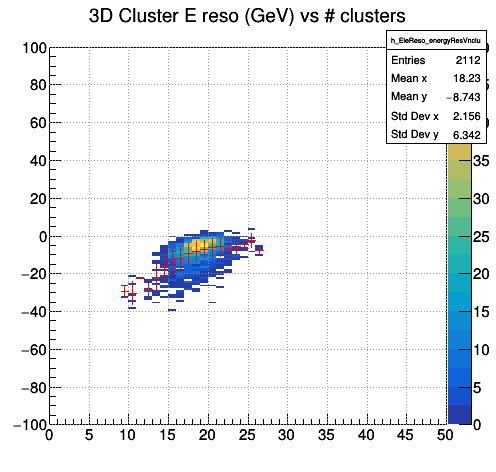

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


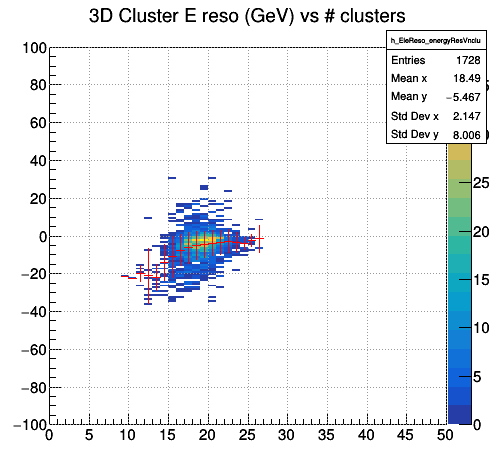

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


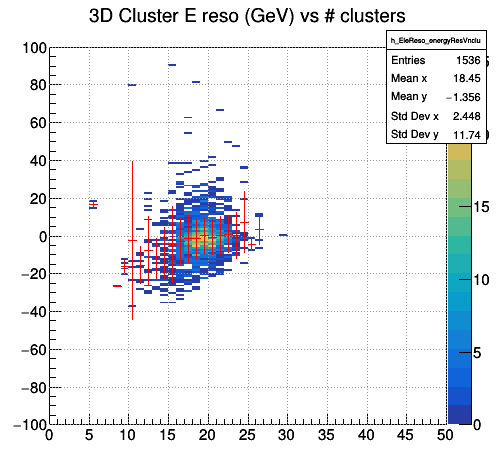

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


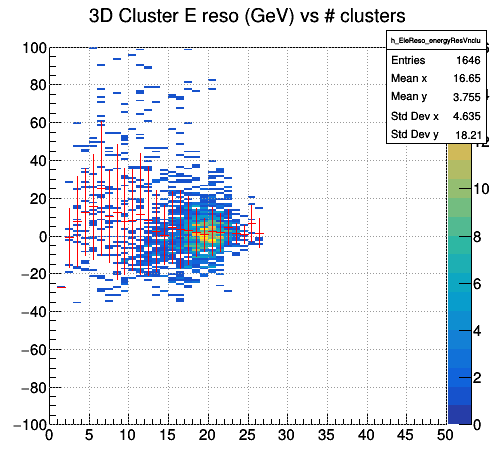

In [53]:
helereso_energyResVnclu = [hist.h_energyResVnclu for hist in helereso_histos]
drawSeveral(helereso_energyResVnclu, elePu_labels, 'COLZ',do_profile=True)


In [54]:
helereso_energyResVnclu_1 = [hist.h_energyResVnclu.ProjectionY(uuid.uuid4().hex[:6], 19, 26).Rebin(2) for hist in helereso_histos]
drawSame(helereso_energyResVnclu_1, elePu_labels, options='hist')



In [55]:
helereso_energyResVnclu_2 = [hist.h_energyResVnclu.ProjectionY(uuid.uuid4().hex[:6], 1, 18).Rebin(2) for hist in helereso_histos]
drawSame(helereso_energyResVnclu_2, elePu_labels, options='hist')


The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


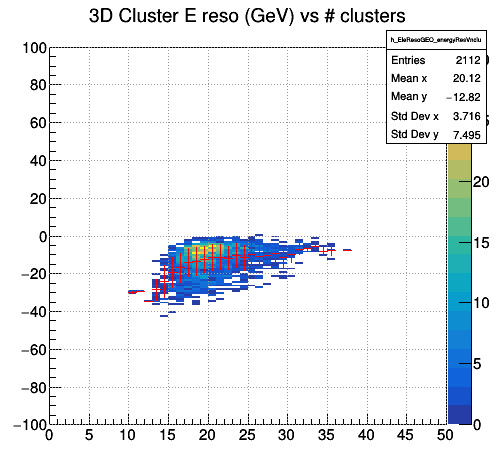

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


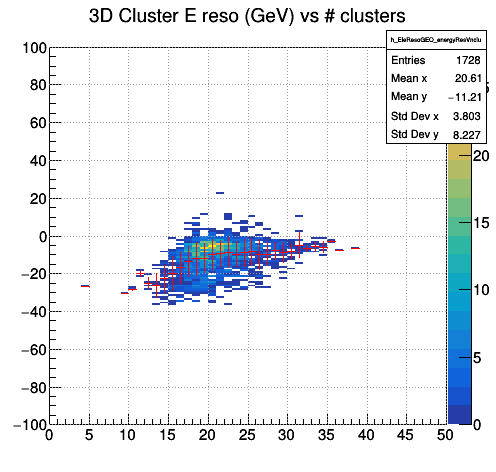

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


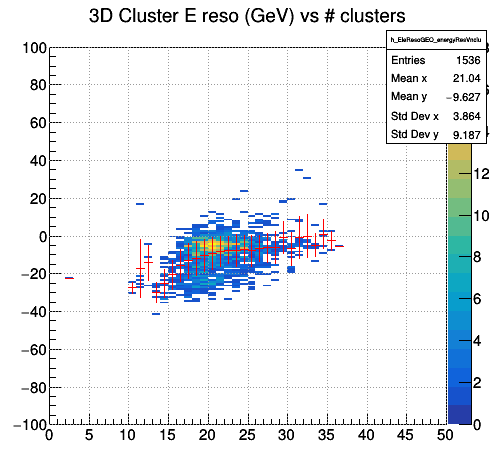

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


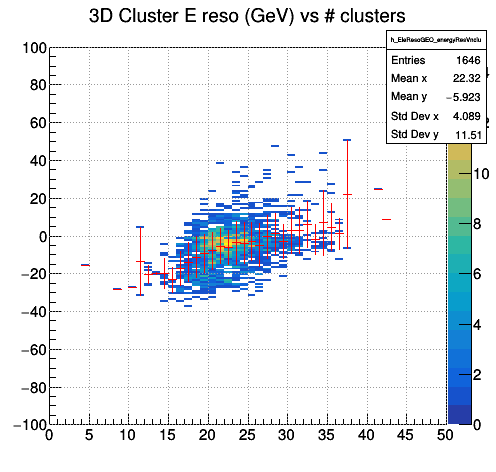

In [56]:
heleresoGEO_energyResVnclu = [hist.h_energyResVnclu for hist in heleresoGEO_histos]
drawSeveral(heleresoGEO_energyResVnclu, elePu_labels, 'COLZ',do_profile=True)


In [57]:
heleresoGEO_energyResVnclu_1 = [hist.h_energyResVnclu.ProjectionY(uuid.uuid4().hex[:6], 19, 26).Rebin(2) for hist in heleresoGEO_histos]
drawSame(heleresoGEO_energyResVnclu_1, elePu_labels, options='hist')


In [58]:
heleresoGEO_energyResVnclu_2 = [hist.h_energyResVnclu.ProjectionY(uuid.uuid4().hex[:6], 1, 18).Rebin(2) for hist in heleresoGEO_histos]
drawSame(heleresoGEO_energyResVnclu_2, elePu_labels, options='hist')


The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


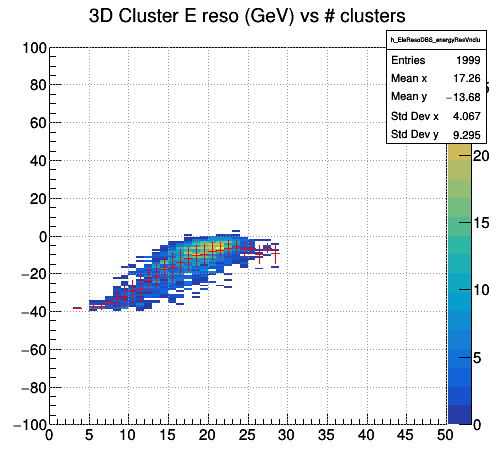

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


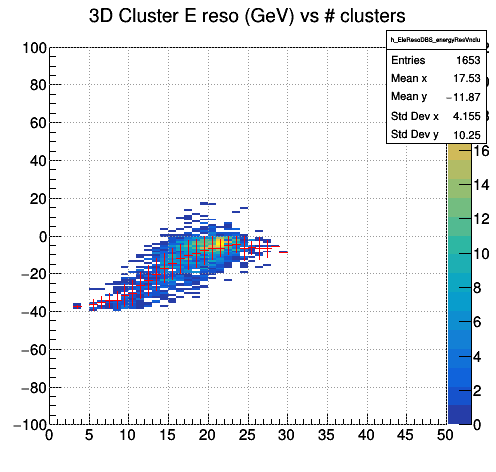

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


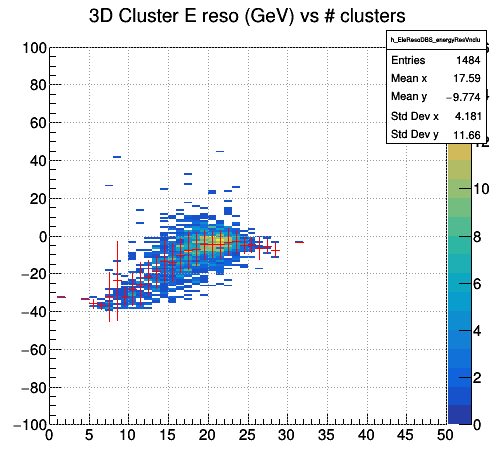

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


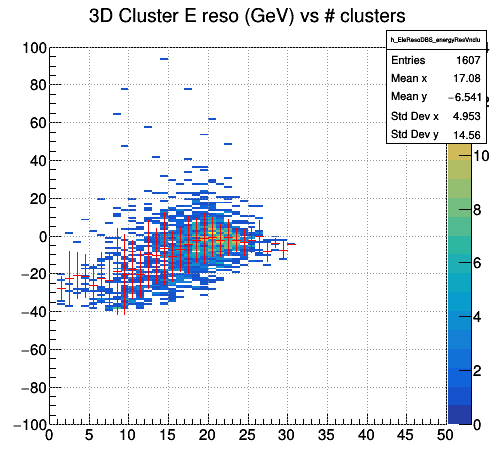

In [59]:
heleresoDBS_energyResVnclu = [hist.h_energyResVnclu for hist in heleresoDBS_histos]
drawSeveral(heleresoDBS_energyResVnclu, elePu_labels, 'COLZ',do_profile=True)


In [60]:
heleresoDBS_energyResVnclu_1 = [hist.h_energyResVnclu.ProjectionY(uuid.uuid4().hex[:6], 19, 26).Rebin(2) for hist in heleresoDBS_histos]
drawSame(heleresoDBS_energyResVnclu_1, elePu_labels, options='hist')


In [61]:
heleresoDBS_energyResVnclu_2 = [hist.h_energyResVnclu.ProjectionY(uuid.uuid4().hex[:6], 1, 18).Rebin(2) for hist in heleresoDBS_histos]
drawSame(heleresoDBS_energyResVnclu_2, elePu_labels, options='hist')


The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


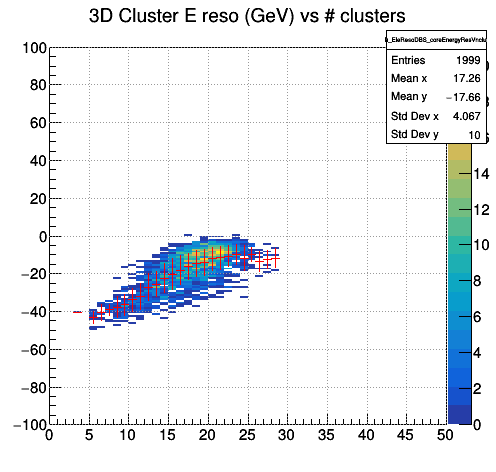

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


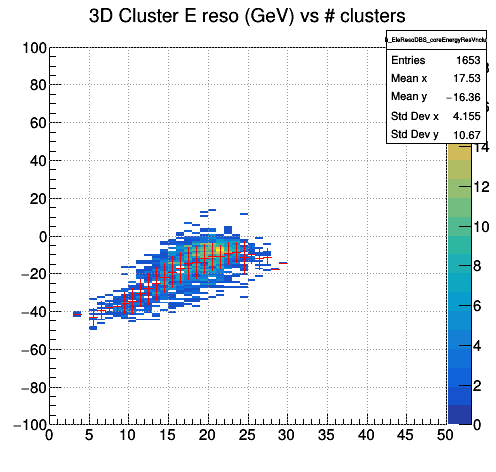

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


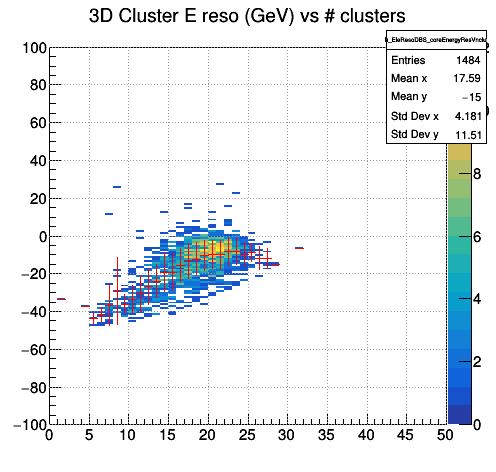

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


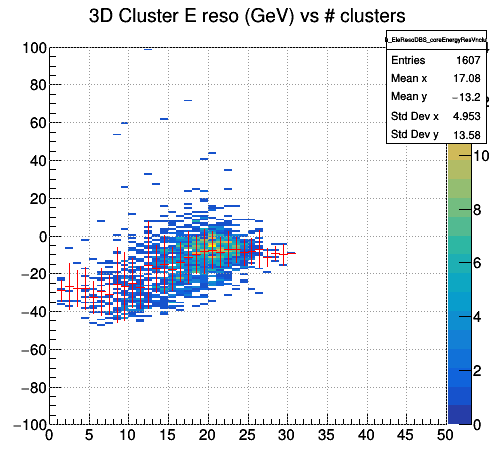

In [62]:
heleresoDBS_coreEnergyResVnclu = [hist.h_coreEnergyResVnclu for hist in heleresoDBS_histos]
drawSeveral(heleresoDBS_coreEnergyResVnclu, elePu_labels, 'COLZ',do_profile=True)


In [65]:
heleresoDBS_coreEnergyResVnclu_1 = [hist.h_coreEnergyResVnclu.ProjectionY(uuid.uuid4().hex[:6], 19, 26).Rebin(2) for hist in heleresoDBS_histos]
drawSame(heleresoDBS_coreEnergyResVnclu_1, elePu_labels, options='hist')


In [66]:
heleresoDBS_coreEnergyResVnclu_2 = [hist.h_coreEnergyResVnclu.ProjectionY(uuid.uuid4().hex[:6], 1, 18).Rebin(2) for hist in heleresoDBS_histos]
drawSame(heleresoDBS_coreEnergyResVnclu_2, elePu_labels, options='hist')


In [67]:
drawSame([helereso_energyResVnclu_1[3], heleresoGEO_energyResVnclu_1[3], heleresoDBS_energyResVnclu_1[3], heleresoDBS_coreEnergyResVnclu_1[3]], ['NN PU200', 'GEO PU 200', 'DBS PU 200', 'DBS Core PU200'], options='hist',norm=True)

In [68]:
drawSame([helereso_energyResVnclu_2[3], heleresoDBS_energyResVnclu_2[3], heleresoDBS_coreEnergyResVnclu_2[3]], ['NN PU200', 'DBS PU 200', 'DBS Core PU200'], options='hist',norm=True)

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


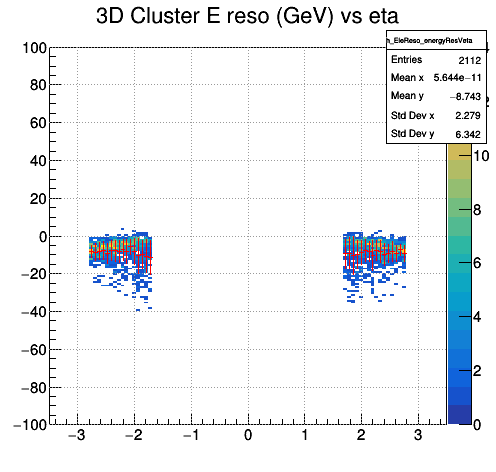

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


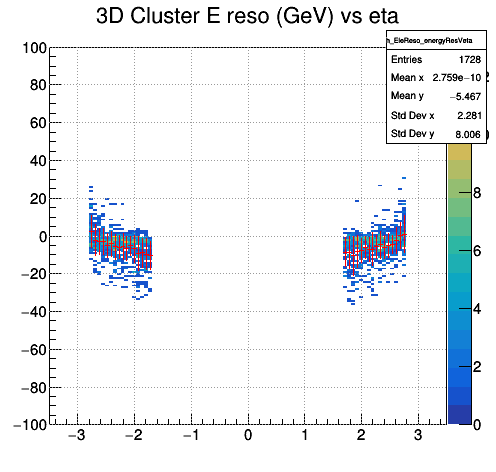

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


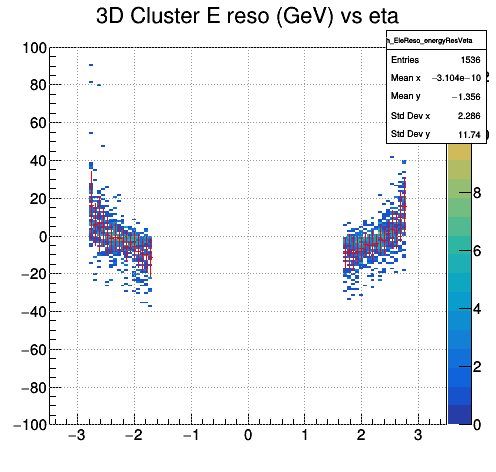

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


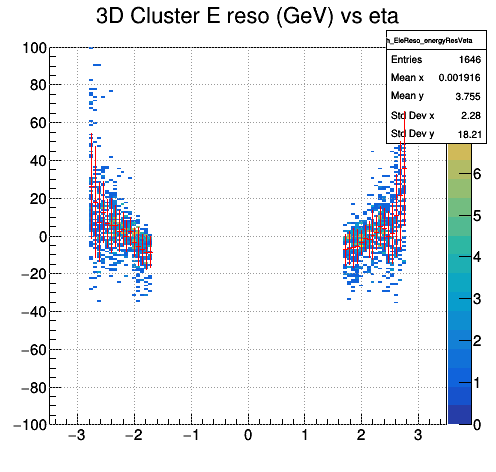

In [69]:
helereso_energyResVeta = [hist.h_energyResVeta for hist in helereso_histos]
drawSeveral(helereso_energyResVeta, elePu_labels, 'COLZ',do_profile=True)


The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


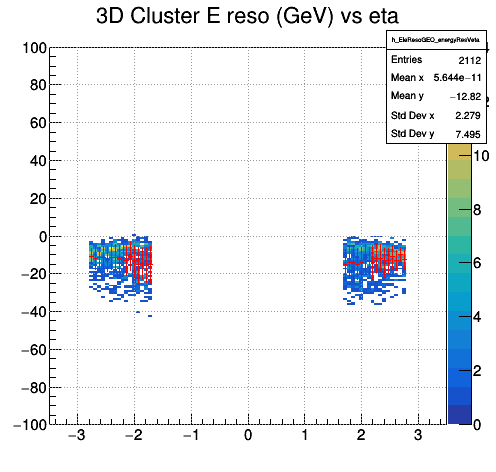

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


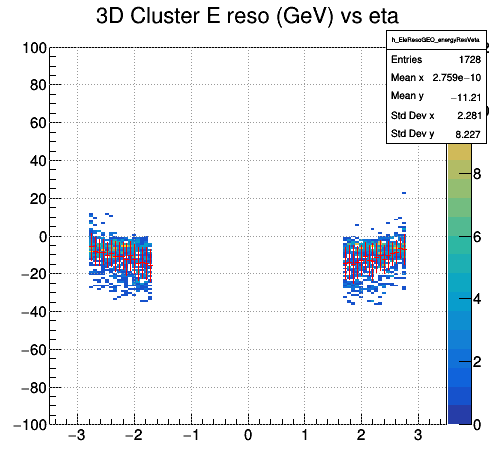

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


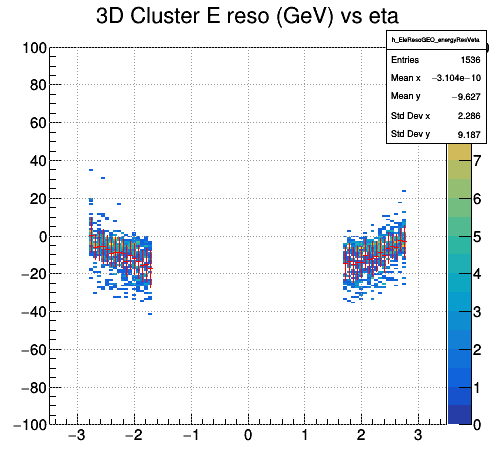

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


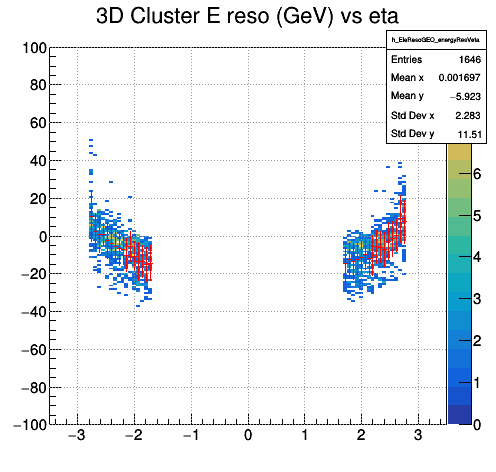

In [71]:
heleresoGEO_energyResVeta = [hist.h_energyResVeta for hist in heleresoGEO_histos]
drawSeveral(heleresoGEO_energyResVeta, elePu_labels, 'COLZ',do_profile=True)


The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


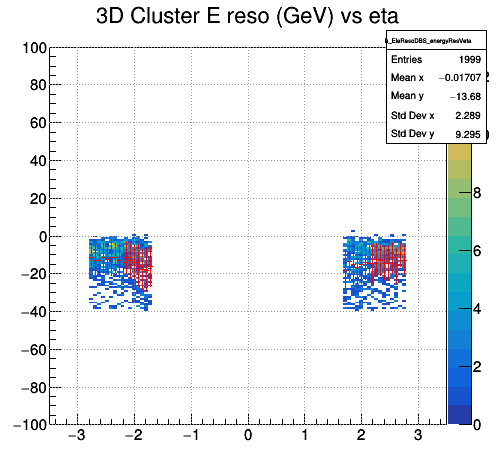

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


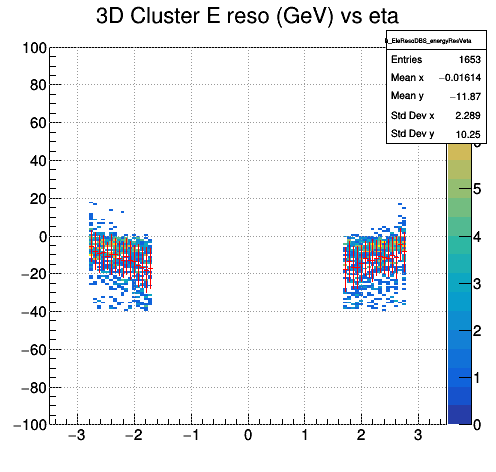

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


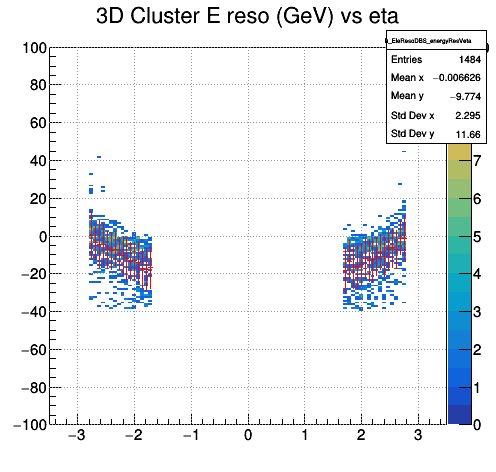

The canvas contains an object of a type jsROOT cannot currently handle (TProfile). Falling back to a static png.


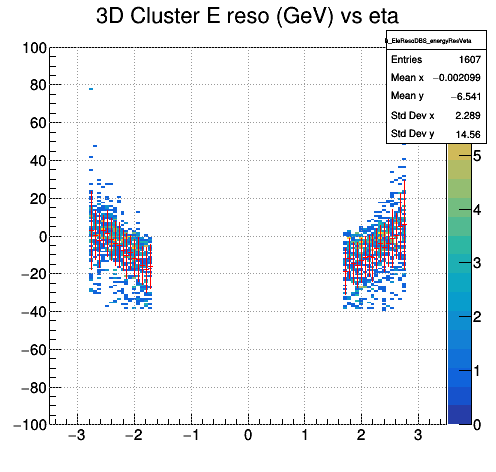

In [70]:
heleresoDBS_energyResVeta = [hist.h_energyResVeta for hist in heleresoDBS_histos]
drawSeveral(heleresoDBS_energyResVeta, elePu_labels, 'COLZ',do_profile=True)


In [ ]:
helereso_energyResCentral = [hist.h_energyResVeta.ProjectionY(uuid.uuid4().hex[:6], 15, 86) for hist in helereso_histos]
heleresoDBS_energyResCentral = [hist.h_energyResVeta.ProjectionY(uuid.uuid4().hex[:6], 15, 86) for hist in heleresoDBS_histos]

In [ ]:
drawSame(helereso_energyResCentral, elePu_labels,options='hist')

In [ ]:
drawSame(heleresoDBS_energyResCentral, elePu_labels,options='hist')

In [ ]:
drawSame([helereso_energyResCentral[0], heleresoDBS_energyResCentral[0]], ['PU0 NN clusters', 'PU0 DBSCAN clusters'], options='hist', norm=False)


In [ ]:
drawSame([helereso_energyResCentral[3], heleresoDBS_energyResCentral[3]], ['PU200 NN clusters', 'PU200 DBSCAN clusters'], options='hist', norm=False)


In [ ]:
helereso_profEnergyResVeta = [hist.ProfileX(uuid.uuid4().hex[:6]) for hist in helereso_energyResVeta]
heleresoDBS_profEnergyResVeta = [hist.ProfileX(uuid.uuid4().hex[:6]) for hist in heleresoDBS_energyResVeta]


In [ ]:
drawSame([helereso_profEnergyResVeta[0], heleresoDBS_profEnergyResVeta[0]],['NN PU0', 'DBS PU0'])

In [ ]:
drawSame([helereso_profEnergyResVeta[1], heleresoDBS_profEnergyResVeta[1]],['NN PU50', 'DBS PU50'])

In [ ]:
drawSame([helereso_profEnergyResVeta[2], heleresoDBS_profEnergyResVeta[2]],['NN PU100', 'DBS PU100'])

In [ ]:
drawSame([helereso_profEnergyResVeta[3], heleresoDBS_profEnergyResVeta[3]],['NN PU200', 'DBS PU200'])

In [ ]:
hreso2D_etaRes = [hist.h_etaRes for hist in hreso2D_histos]
drawSame(hreso2D_etaRes, elePu_labels,options='hist', logy=True)

In [ ]:
hreso2DDBS_etaRes = [hist.h_etaRes for hist in hreso2DDBS_histos]
drawSame(hreso2DDBS_etaRes, elePu_labels,options='hist', logy=True)

In [ ]:
hreso2D_phiMRes = [hist.h_phiMRes for hist in hreso2D_histos]
drawSame(hreso2D_phiMRes, elePu_labels,options='hist', logy=True)

In [ ]:
hreso2DDBS_phiMRes = [hist.h_phiMRes for hist in hreso2DDBS_histos]
drawSame(hreso2DDBS_phiMRes, elePu_labels,options='hist', logy=True)

In [ ]:
drawSame([hreso2D_phiMRes[3], hreso2DDBS_phiMRes[3]],['PU200 NN', 'PU200 DBS'], logy=True)